$$f(x,y)=\frac{1}{2\sqrt{(\pi^2 + x^2 + (y-1)^2)^3}}$$

Покомпонентные плотности распределения:
$$f(x)=\frac{1}{\pi^2 + x^2}$$
$$f(y)=\frac{1}{\pi^2 + (y-1)^2}$$

Совместные плотности распределения:
$$f(x|y)=\frac{f(x,y)}{f(y)}=\frac{\pi^2 + (y-1)^2}{2\sqrt{(\pi^2 + x^2 + (y-1)^2)^3}}$$
$$f(y|x)=\frac{f(x,y)}{f(x)}=\frac{\pi^2 + x^2}{2\sqrt{(\pi^2 + x^2 + (y-1)^2)^3}}$$

Покомпонентные функции распределения:
$$F(y)=\int_{-\infty}^{y}\frac{1}{\pi^2 + (t-1)^2}dt=\frac{1}{\pi}arctg\frac{y-1}{\pi}+\frac{1}{2}$$
$$F(x|y)=\int_{-\infty}^{x}\frac{\pi^2 + (y-1)^2}{2\sqrt{(\pi^2 + x^2 + (y-1)^2)^3}}dt=\frac{x}{2\sqrt{\pi^2 + x^2 + (y-1)^2}} + \frac{1}{2}$$

Разложим функцию распределения
$$F(x,y)=F(y)F(x|y)$$

Промоделируем отдельно $F(y)$ и $F(x|y)$:
  
$$\begin{cases}
 \xi_1=\frac{1}{\pi}arctg\frac{y-1}{\pi} + \frac{1}{2} \\ 
 \xi_2=\frac{x}{2\sqrt{a^2+x^2}} + \frac{1}{2} 
\end{cases}, a=\sqrt{\pi^2+(y-1)^2}$$


$$\begin{cases}
  y=1+\pi tg(\pi \xi_1 - \frac{\pi}{2}) \\
  x=sgn(2\xi_2 - 1) sgn(1-(2\xi_2-1)^2) \frac{a\left | 2\xi_2 - 1 \right |}{\sqrt{\left | 1-(2\xi_2-1)^2 \right |}}
\end{cases}$$

In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('ggplot')

In [188]:
rng = np.arange(-6, 6, 0.1)
X, Y = np.meshgrid(rng, rng)

In [189]:
Z = 1 / (2 * (math.pi**2 + X**2 + (Y - 1)**2)**1.5)

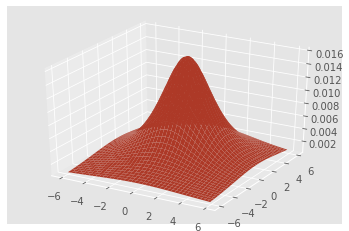

In [190]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z);

In [5]:
from statlib.rand.basic_rand import BasicRand
from statlib.rand.engine import LCG

In [6]:
gen = BasicRand(LCG())

In [180]:
n = 5000000

In [181]:
xi1 = np.array([gen.next() for _ in range(n)])
xi2 = np.array([gen.next() for _ in range(n)])

y_p = 1 + math.pi * np.tan(math.pi * xi1 - math.pi / 2)
a = np.sqrt(math.pi**2 + (y_p - 1)**2)
t = 2 * xi2 - 1
x_p = np.sign(t) * np.sign(1 - t**2) * a * np.abs(t) / np.sqrt(np.abs(1 - t**2)) 

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(x_p, y_p, bins=100, range=[[-6, 6], [-6, 6]], normed=True)

xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1])
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = dy = np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz)

plt.show()

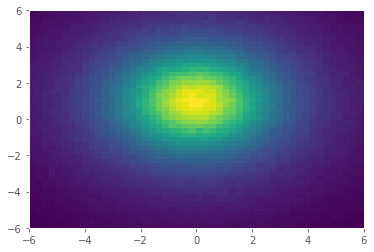

In [192]:
plt.hist2d(x_p, y_p, bins=(50, 50), range=[(-6, 6), (-6, 6)]);

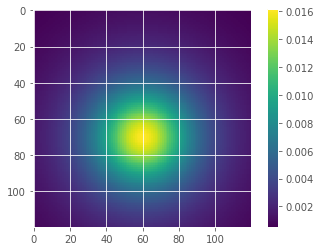

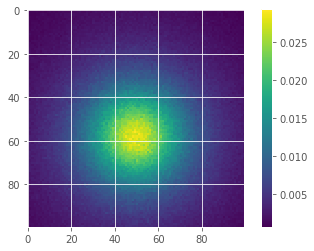

In [208]:
plt.imshow(Z)
plt.colorbar()
plt.show()

plt.imshow(hist.T)
plt.colorbar()
plt.show()

In [217]:
np.sum(hist)

69.44444444444444